<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Hands-On%20Machine%20Learning/Chapter%203%3A%20Classification/Classification_draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [1]:
#pull MNIST dataset from OpenML
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name="mnist_784")

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X = mnist.data
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

grab one sample


In [6]:
import numpy as np

randIndex = 100#np.random.randint(0, len(X))
sample_X = X[randIndex]
sample_y = y[randIndex]

sample_y

'5'

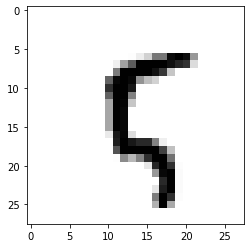

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(sample_X.reshape(28,28), cmap=mpl.cm.binary)

In [8]:
#grab 100 samples
X_samples = X[:3]


In [9]:
#scratch work for image array
instances = X_samples

size = 28
images_per_row = 10
images_per_row = min(len(instances), images_per_row)
n_rows = len(instances) + 1 // images_per_row - 1 #int(np.ceil(len(instances)/images_per_row))

#need to pad the remaining elements in the row
n_padding = (n_rows * images_per_row) - len(instances)

print(n_rows, n_padding, len(instances))

2 3 3


In [10]:
padded_instances = np.concatenate([instances, np.zeros((n_padding, size * size))], axis=0)
padded_instances.shape

(6, 784)

In [11]:
image_grid = padded_instances.reshape(n_rows, images_per_row, size, size)
image_grid.shape

(2, 3, 28, 28)

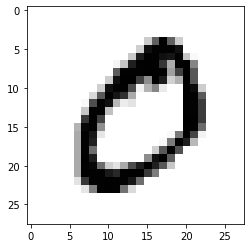

In [12]:
plt.imshow(image_grid[0,1], cmap=mpl.cm.binary)

In [13]:
#np.transpose() : For an n-D array, if axes are given, their order indicates how the axes are permuted
image_grid2 = image_grid.transpose((0,2,1,3))
image_grid2.shape

(2, 28, 3, 28)

In [14]:
image_grid2 = image_grid2.reshape(n_rows * size, images_per_row * size)

In [15]:
image_grid2.shape

(56, 84)

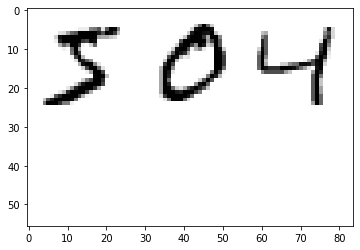

In [16]:
plt.imshow(image_grid2, cmap=mpl.cm.binary)

In [17]:
def plot_digits(instances, images_per_row=10, **options):

  size = 28 # 28 x 28 images
  img_per_row = min(len(instances), images_per_row)

  #calculate number of rows needed
  #this is equivalent to ceil(len(instances)/img_per_row) although I'm not sure how.
  #going to read up on this in a discrete math book
  n_rows = len(instances) - 1 // img_per_row + 1 

  #in case the instances are less than number of rows * the images per row, we'll pad them with zeros
  #of 28 x 28 dimension. the rows of padded_instances are images flattened out. 
  padded_instances = np.concatenate([instances, np.zeros(n_rows, size * size)], axis=0)

  #we perform a reshaping of the padded_instances. each row in padded_instances will fill a 28x28 (size x size)
  #square. there are n_row * img_per_row of these squares. e.g. the element num_grid[0,0] contains a 28x28
  #ndarray of numbers corresponding to the first row of instances
  num_grid = padded_instances.rehape(n_rows, img_per_row, size, size)

  #num_grid is a 4D array that needs to be mapped to a 2D array before rendering. 
  #We will have to modify the way the 4D array is indexed, by using the function transpose(), prior to mapping it using reshape().
  #ex) num_grid(0,1,12,18) is the (12,18) pixel of image (0,1)
  #the operation transpose(0,2,1,3) will modify the index so that the first two indices are rows and last two are columns
  #of the image grid and pixels, respectively. For example, the incrementing indices (0,0,0,0) -> (0,0,0,1) -> (0,0,0,2)
  #will sweep across the first row of pixels of images num_grid's first row. 
  num_grid_2D = num_grid.transpose(0,2,1,3).reshape((n_rows * size, img_per_row * size))

  mpl.imshow(num_grid_2D)
